### Install Libraries
The pre-installed libraries on ML Studio are pretty old. I'm mathcing it to the env on my machine

In [1]:
!pip install matplotlib==2.1.2

    100% |ââââââââââââââââââââââââââââââââ| 15.0MB 25kB/s eta 0:00:011
  Found existing installation: matplotlib 1.5.1
    Uninstalling matplotlib-1.5.1:
      Successfully uninstalled matplotlib-1.5.1
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install scikit-learn==0.20.2

    100% |ââââââââââââââââââââââââââââââââ| 5.3MB 180kB/s eta 0:00:01
  Found existing installation: scikit-learn 0.18.1
    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling scikit-learn-0.18.1:
      Successfully uninstalled scikit-learn-0.18.1
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install seaborn==0.8.1

    100% |ââââââââââââââââââââââââââââââââ| 184kB 4.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/26/0a/44/53ddd89769e62f7c6691976375b86c6492e7dd20a2d3970e32
Successfully built seaborn
  Found existing installation: seaborn 0.7.1
    DEPRECATION: Uninstalling a distutils installed project (seaborn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Import Libraries

In [68]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load and Pre-process Data
https://www.kaggle.com/shivachandel/kc-house-data

In [69]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['kc_house_data.csv']
houseprice_df = ds.to_dataframe()

In [70]:
houseprice_df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7563,2787250090,20140618T000000,562000.0,5,3.00,2795,15101,2.0,0,0,...,8,2795.0,0,1996,0,98019,47.7301,-121.972,2750,14567
10696,3343901242,20140807T000000,335000.0,3,1.50,1900,7584,1.0,0,0,...,7,1900.0,0,1962,0,98056,47.5091,-122.190,1410,7584
17100,9297300500,20141023T000000,435000.0,2,1.00,870,4000,1.0,0,2,...,7,870.0,0,1950,0,98126,47.5682,-122.374,1690,4000
5201,8857600680,20150313T000000,285900.0,5,1.50,1690,7725,1.5,0,0,...,7,1690.0,0,1961,0,98032,47.3859,-122.288,1690,7739
4577,6021503740,20150304T000000,690000.0,3,1.00,1090,4000,1.5,0,0,...,7,1090.0,0,1945,0,98117,47.6846,-122.386,1520,4000
19463,1152000040,20141010T000000,774888.0,3,2.25,2420,23507,1.0,0,0,...,8,2420.0,0,1969,0,98027,47.5107,-122.027,2540,22257
11627,6117500160,20150317T000000,425000.0,3,1.50,1570,12412,1.0,0,3,...,8,1570.0,0,1954,0,98166,47.4380,-122.349,2130,12412
10970,3271300955,20150224T000000,868000.0,4,2.50,2020,4350,2.0,0,0,...,9,1730.0,290,1943,0,98199,47.6503,-122.410,1620,5800
12466,1121039105,20141203T000000,399950.0,4,3.00,2150,64694,1.0,0,0,...,8,1450.0,700,1969,0,98023,47.3268,-122.388,2430,59612
18555,1778350150,20140811T000000,839000.0,5,4.00,4280,11307,2.0,0,0,...,10,2710.0,1570,1996,0,98027,47.5503,-122.081,3080,11307


In [71]:
houseprice_df.shape

(21613, 21)

Drop unneccessary columns

In [72]:
houseprice_df = houseprice_df.drop(["id", "date", "zipcode", "lat", "long"], axis = 1)

In [73]:
houseprice_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503


Replace the year a building was renovated in, with a boolean value to indicate if it was renovated or not

In [74]:
houseprice_df.loc[houseprice_df['yr_renovated'] > 1, 'yr_renovated'] = 1

In [75]:
houseprice_df['yr_renovated'].head()

0    0
1    1
2    0
3    0
4    0
Name: yr_renovated, dtype: int64

Clean missing values

In [76]:
houseprice_df = houseprice_df.dropna()

Change the data type of categorical values

In [77]:
houseprice_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [78]:
col_names = ['waterfront', 'view', 'yr_renovated']

In [79]:
for col in col_names:
    houseprice_df[col] = houseprice_df[col].astype('category', copy=False)

In [80]:
houseprice_df.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated     category
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [82]:
from azureml import DataTypeIds

dataset = ws.datasets.add_from_dataframe(
    dataframe=houseprice_df,
    data_type_id=DataTypeIds.GenericCSV,
    name='houseprice_data',
    description='updated house price data'
)

### Explore Dataset

In [83]:
houseprice_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,3.409421,7.656888,1788.396095,291.457360,1971.007959,1986.559576,12769.025357
std,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.650755,1.175502,828.128162,442.487355,29.372358,685.416548,27305.369808
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,2360.000000,10083.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


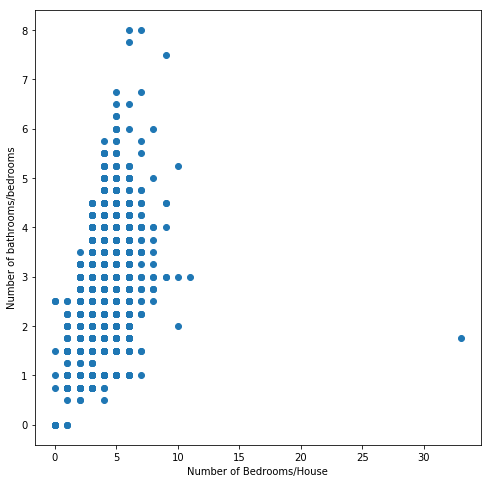

In [84]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(houseprice_df['bedrooms'], houseprice_df['bathrooms'])

plt.xlabel('Number of Bedrooms/House')
plt.ylabel('Number of bathrooms/bedrooms')
plt.show()

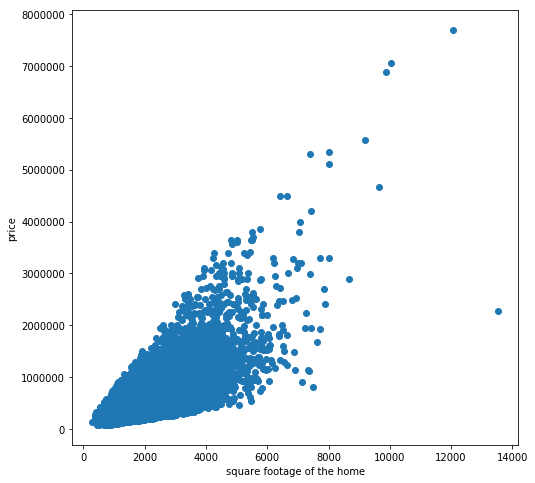

In [85]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(houseprice_df['sqft_living'], houseprice_df['price'])

plt.xlabel('square footage of the home')
plt.ylabel('price')
plt.show()

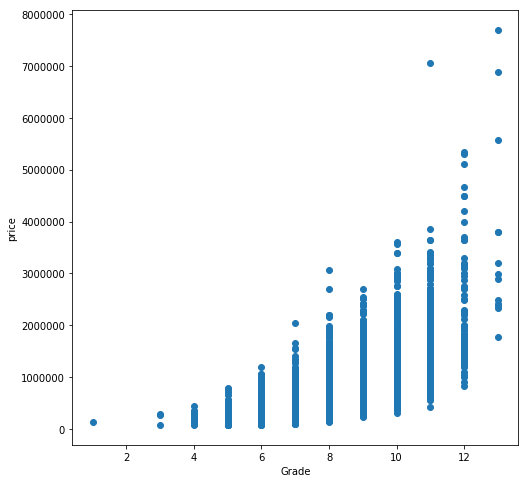

In [86]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(houseprice_df['grade'], houseprice_df['price'])

plt.xlabel('Grade')
plt.ylabel('price')
plt.show()

In [87]:
houseprice_corr = houseprice_df.corr()

houseprice_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.036379,0.667434,0.605567,0.323842,0.054006,0.585377,0.082448
bedrooms,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,0.028433,0.356998,0.477616,0.303251,0.154248,0.391670,0.029252
bathrooms,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,-0.124917,0.664981,0.685363,0.283737,0.505968,0.568626,0.087163
sqft_living,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,-0.058689,0.762727,0.876644,0.434925,0.318066,0.756440,0.183301
sqft_lot,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,-0.008951,0.113617,0.183511,0.015301,0.053061,0.144605,0.718556
floors,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.279907,-0.011275
condition,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.092795,-0.003397
grade,0.667434,0.356998,0.664981,0.762727,0.113617,0.458208,-0.144647,1.000000,0.755924,0.168375,0.446958,0.713197,0.119243
sqft_above,0.605567,0.477616,0.685363,0.876644,0.183511,0.523899,-0.158206,0.755924,1.000000,-0.051976,0.423915,0.731871,0.194048
sqft_basement,0.323842,0.303251,0.283737,0.434925,0.015301,-0.245634,0.174273,0.168375,-0.051976,1.000000,-0.133195,0.200341,0.017292


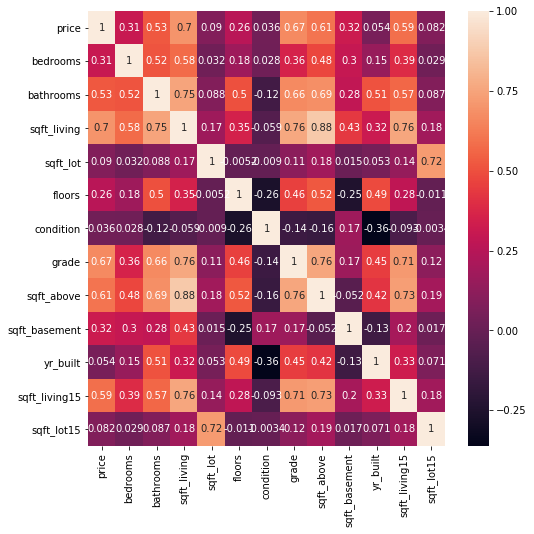

In [88]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.heatmap(houseprice_corr, annot=True)
plt.show()

### Build and Train the Model

In [89]:
Y = houseprice_df['price']

In [90]:
X = houseprice_df.drop('price', axis = 1)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [92]:
x_train.shape, y_train.shape

((12966, 15), (12966,))

In [93]:
x_test.shape, y_test.shape

((8645, 15), (8645,))

In [94]:
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_test, y_test)

0.64508703578689564

### Demo m3d2 : Cross Validation
By default scoring is "r2" for regression in cross_val_score and cv=5 means it is using 5-fold cross validation.

In [1]:
from sklearn.model_selection import cross_val_score

In [2]:
reg = LinearRegression()

scores = cross_val_score(reg, X, Y, cv=5, scoring='r2')

NameError: name 'LinearRegression' is not defined

Here are the scoring types that we can use in cross_val_score method for regression and classification.

In [3]:
print(sklearn.metrics.SCORERS.keys())

NameError: name 'sklearn' is not defined

In [98]:
scores

array([ 0.65605518,  0.65077556,  0.64342074,  0.65808578,  0.62575563])